In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# to print plots inline
%matplotlib inline

In [2]:
β = 0.96
b = 0.05
μ = 0.0
σ = 0.15
N = 5  # number of random draws

In [12]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of w and w'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of w' for all w 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
lb_w = 0.4 
ub_w = 2.0 
size_w = 200  # Number of grid points
w_grid = np.linspace(lb_w, ub_w, size_w)
w = lognorm.rvs(s=σ, size = (size_w, N))
VFtol = 1e-8 
VFdist = 7.0 
VFmaxiter = 3000 
V = np.zeros(size_w) # initial guess at value function
TV = np.zeros((size_w, size_w))
Vmat = np.zeros((size_w, size_w)) # initialize Vmat matrix
Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:  
    for i in range(size_w): # loop over w
        for j in range(size_w): # loop over w'
            v_a = w * β**j
            v_d = b + β * V[j]
            TV[i, j] = max(v_a, v_d)
    Vstore[:, :, VFiter] = TV # store value function at each iteration for graphing later 
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 
    
if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            

VF = V # solution to the functional equation

SyntaxError: can't assign to function call (<ipython-input-12-8a5ef5ae02b5>, line 35)

NameError: name 'VF' is not defined

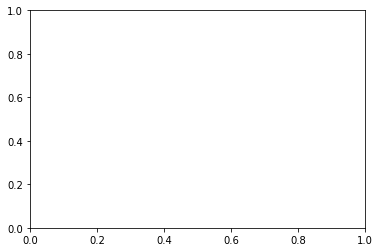

In [14]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(w_grid[1:], VF[0, 1:], label='$wage$ = ' + str(w_grid[0]))
ax.plot(w_grid[1:], VF[1, 1:], label='$wage$ = ' + str(w_grid[1]))
ax.plot(w_grid[1:], VF[2, 1:], label='$wage$ = ' + str(w_grid[2]))
ax.plot(w_grid[1:], VF[3, 1:], label='$wage$ = ' + str(w_grid[3]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Wage')
plt.ylabel('Value Function')
plt.title('Value Function - Exercise 4')
plt.show()